# Explore here

In [59]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

dataframe = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", delimiter=",")

dataframe.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [61]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [62]:
if dataframe.isna().sum().sum() > 0 or dataframe.isnull().sum().sum() > 0:
    dataframe.dropna(inplace=True, axis=1, how=all)
    print("There are missing values")

if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates().reset_index(drop=True)
    print("There are duplicates")

dataframe.describe()

There are duplicates


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [63]:
dataframe['sex'] = pd.factorize(dataframe['sex'])[0]
dataframe["smoker"] = dataframe["smoker"].map({"no": 0, "yes": 1})
dataframe = pd.get_dummies(dataframe, columns=['region'], drop_first=True)
dataframe = dataframe.apply(lambda x: x.astype(int) if x.name.startswith('region_') else x)
dataframe.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


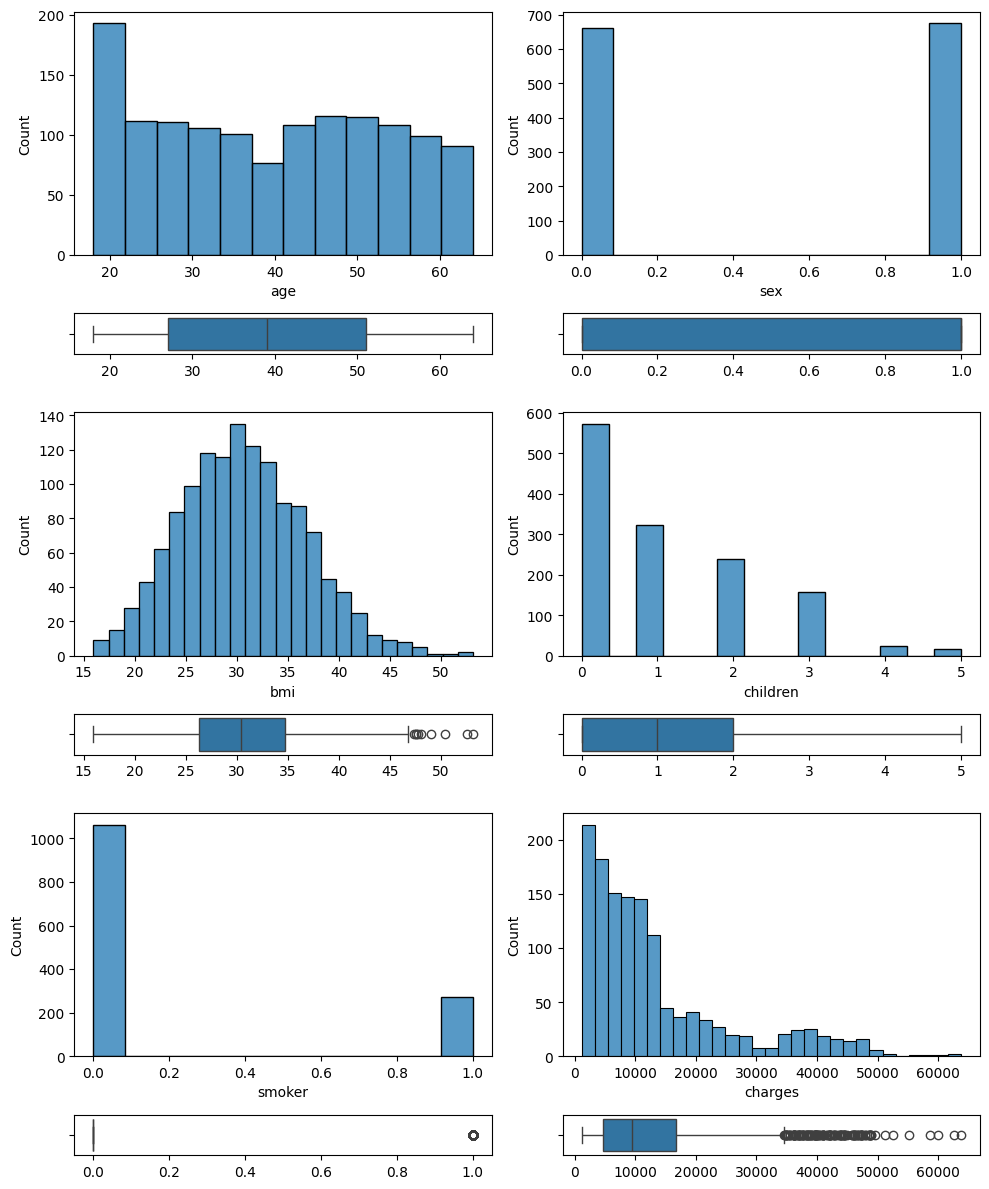

In [64]:
features = dataframe.drop(columns=['region_northwest', 'region_southeast', 'region_southwest']).columns

fig, ax = plt.subplots(len(features), 2, figsize=(10, 12), 
                       gridspec_kw={'height_ratios': [6, 1] * (len(features) // 2)})

for i, feature in enumerate(features):
    row = (i // 2) * 2 
    col = i % 2
    sns.histplot(ax=ax[row, col], data=dataframe, x=feature)
    sns.boxplot(ax=ax[row + 1, col], data=dataframe, x=feature).set(xlabel=None)


plt.tight_layout()
plt.show()

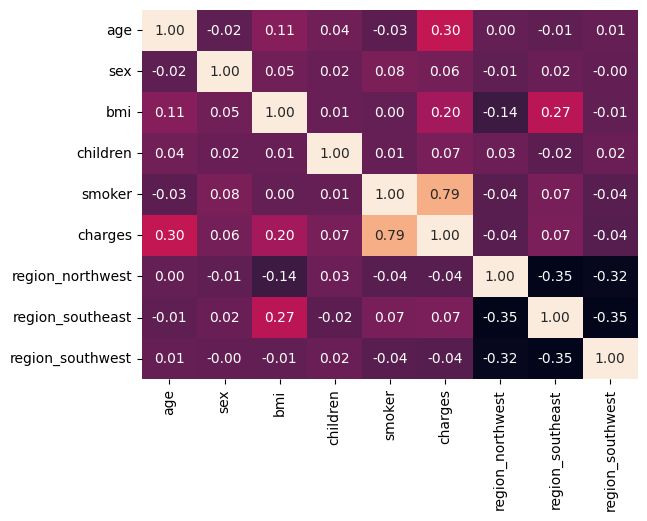

In [65]:
sns.heatmap(dataframe.corr(),  annot = True, fmt = ".2f", cbar = False)
plt.show()


In [66]:
X = dataframe.drop("charges", axis=1)
y = dataframe["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train.to_csv("../data/processed/X_train.csv")
X_test.to_csv("../data/processed/X_test.csv")
y_train.to_csv("../data/processed/y_train.csv")
y_test.to_csv("../data/processed/y_test.csv")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns.values)

X_test_scaled.describe()




,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.008494,-0.096204,0.101463,0.048235,0.059213,-0.053518,0.042508,-0.055616
std,1.018533,1.000029,1.037898,1.046035,1.043691,0.968416,1.022992,0.967188
min,-1.515026,-1.029432,-2.269037,-0.907908,-0.500292,-0.572669,-0.605812,-0.574110
25%,-0.961140,-1.029432,-0.617527,-0.907908,-0.500292,-0.572669,-0.605812,-0.574110
50%,0.057296,-1.029432,0.094987,-0.070502,-0.500292,-0.572669,-0.605812,-0.574110
75%,0.843457,0.971409,0.780016,0.766904,-0.500292,-0.572669,1.650678,-0.574110
max,1.772556,0.971409,2.897924,3.279123,1.998831,1.746208,1.650678,1.741827


In [67]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")


Intercept (a): 13030.203369289053
Coefficients (b1, b2): [3472.97555343  -50.74967467 1927.82825101  636.5011853  9234.34248701
 -168.94443943 -371.7808097  -284.61039635]


In [68]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

[ 8.14369388e+03  5.73711568e+03  1.43693149e+04  3.17455136e+04
  8.96238666e+03  1.31497224e+04  3.04467607e+04  1.45328881e+03
  1.06330184e+04  1.13189438e+04  1.03778536e+04  3.31184377e+04
  3.10772527e+04  1.74119253e+04  1.08016743e+04  9.52889964e+03
  4.16103784e+03  3.17315373e+04  3.21938875e+03  5.22992460e+03
  3.54979004e+03  3.02837740e+04  1.48989509e+04  3.04569093e+04
  3.11077668e+04  5.51196081e+03  3.55030401e+04  3.65704810e+04
  1.14123133e+04  1.42056990e+04  6.50234029e+03  1.27246945e+04
  3.99806590e+02  1.20883980e+04  3.96592069e+04  1.23395540e+04
  4.74412279e+03  3.91903157e+03  3.08606789e+04  8.95870663e+03
  7.05389441e+03  3.01125636e+04  3.47804324e+04  1.22916189e+04
  7.35739310e+03  3.42060530e+03  6.21243471e+03  8.98345200e+03
  4.26401828e+03  9.01992870e+03  6.60149578e+03  1.20802337e+04
  3.12447687e+04  3.55341947e+03  1.10470477e+04  9.73512492e+03
  1.08383403e+04  2.42942719e+03  3.11621909e+04  9.40578078e+03
  1.55793421e+04  8.19158

In [69]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 35478020.67523559
Coefficient of determination: 0.8069287081198012
